# <center> Исследование данных HR-агентств

## 1. Постановка задачи

HR-агентство изучает тренды на рынке труда в IT. Компания хочет провести исследование на основе данных о зарплатах в сфере Data Science за 2020–2022 годы и получить некоторые выводы.

В процессе анализа необходимо:

1. Выяснить, какие факторы влияют на зарплату специалиста Data Scientist.
2. Ответить на ключевые вопросы HR-агентства:
   - Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?
   - Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?
   - Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?
   - Есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?

На каждый вопрос необходимо ответить с уровнем значимости $\alpha=0.05$.

Для этого проведем анализ датасета с зарплатами в сфере Data Science.

Данные содержат следующие столбцы:

  - *work_year* - год, в котором была выплачена зарплата.
  - *experience_level* - опыт работы на этой должности в течение года со следующими возможными значениями:
     - EN — Entry-level/Junior;
     - MI — Mid-level/Intermediate;
     - SE — Senior-level/Expert;
     - EX — Executive-level/Director.
  - *employment_type*	- тип трудоустройства для этой роли:
     - PT — неполный рабочий день;
     - FT — полный рабочий день;
     - CT — контракт;
     - FL — фриланс.
  - *job_title*	- роль, в которой соискатель работал в течение года.
  - *salary* - общая выплаченная валовая сумма заработной платы.
  - *salary_currency*	- валюта выплачиваемой заработной платы в виде кода валюты ISO 4217.
  - *salary_in_usd*	- зарплата в долларах США (валютный курс, делённый на среднее значение курса доллара США за соответствующий год через fxdata.foorilla.com).
  - *employee_residence*	- основная страна проживания сотрудника в течение рабочего года в виде кода страны ISO 3166.
  - *remote_ratio*	- общий объём работы, выполняемой удалённо. Возможные значения:
     - 0 — удалённой работы нет (менее 20 %);
     - 50 — частично удалённая работа;
     - 100 — полностью удалённая работа (более 80 %).
  - *company_location* - страна главного офиса работодателя или филиала по контракту в виде кода страны ISO 3166.
  - *company_size*	- среднее количество людей, работавших в компании в течение года:
     - S — менее 50 сотрудников (небольшая компания);
     - M — от 50 до 250 сотрудников (средняя компания);
     - L — более 250 сотрудников (крупная компания).

Источник датасета: ["Data Science Job Salaries” (kaggle.com)"](https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries)

## 2. Загрузка данных

In [136]:
# Загружаем необходимые библиотеки
import pandas as pd

from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Делаем визуальную настройку графиков
sns.set_theme('notebook')
sns.set_palette('Set2')

In [137]:
# Загружаем датасет
data = pd.read_csv('data/ds_salaries.csv', index_col = 'Unnamed: 0')
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [138]:
# Задаем уровень значимости 
alpha = 0.05
print('Уровень значимости alpha = {:.2f}'.format(alpha))

Уровень значимости alpha = 0.05


## 3. Описательный анализ данных

3.1. Найдем пропущенные значения в датасете:

In [139]:
# Посмотрим информацию о датасете
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 56.9+ KB


*Видим, что в датасете 607 записей. Нет пропущенных значений.*

3.2. Проверим данные на наличие полных дубликатов:

In [140]:
print('Количество дубликатов: {}'.format(data[data.duplicated()].shape[0]))

# Удаляем дубликаты:

data = data.drop_duplicates()
print('Размер таблицы после удаления дубликатов: {}'.format(data.shape))

Количество дубликатов: 42
Размер таблицы после удаления дубликатов: (565, 11)


3.3. Проверим корректность типов данных столбцов:

In [141]:
# Исправим тип данных в столбце remote_ratio с int64 на object:

data['remote_ratio'] = data['remote_ratio'].astype(object)

# Проверим тип данных после изменения: 

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 565 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           565 non-null    int64 
 1   experience_level    565 non-null    object
 2   employment_type     565 non-null    object
 3   job_title           565 non-null    object
 4   salary              565 non-null    int64 
 5   salary_currency     565 non-null    object
 6   salary_in_usd       565 non-null    int64 
 7   employee_residence  565 non-null    object
 8   remote_ratio        565 non-null    object
 9   company_location    565 non-null    object
 10  company_size        565 non-null    object
dtypes: int64(3), object(8)
memory usage: 53.0+ KB


3.4. Найдем неинформативные признаки, которые можно сразу удалить, чтобы не загружать датасет лишней информацией.

Проанализировав ключевые вопросы от HR-агенства и признаки, имеющиеся в датасете, выявим следующие признаки, которые не пригодятся в исследовании:

  - *salary* - общая выплаченная валовая сумма заработной платы.
  - *salary_currency*	- валюта выплачиваемой заработной платы в виде кода валюты ISO 4217.

In [142]:
data = data.drop(['salary', 'salary_currency'], axis = 1)

3.5. Классифицируем все признаки на числовые и категориальные, чтобы корректно провести статистический анализ:

*Числовые признаки:*
 - *work_year* - год, в котором была выплачена зарплата;
 - *salary_in_usd*	- зарплата в долларах США;
 
 
*Категориальные признаки:*
 - *experience_level* - опыт работы на этой должности в течение года;
 - *employment_type*	- тип трудоустройства для этой роли;
 - *job_title*	- роль, в которой соискатель работал в течение года;
 - *employee_residence*	- основная страна проживания сотрудника в течение рабочего года в виде кода страны ISO 3166;
 - *remote_ratio*	- общий объём работы, выполняемой удалённо;
 - *company_location* - страна главного офиса работодателя или филиала по контракту в виде кода страны ISO 3166.
 - *company_size*	- среднее количество людей, работавших в компании в течение года.

3.6. Найдем основные статистические характеристики для каждого из признаков:

In [143]:
# Признак work_year:
data_w_y_describe = data['work_year'].describe().round(2).to_frame()
data_w_y_describe.columns = ['Год, в котором была выплачена з/п']
data_w_y_describe

,"Год, в котором была выплачена з/п"
count,565.00
mean,2021.36
std,0.70
min,2020.00
25%,2021.00
50%,2021.00
75%,2022.00
max,2022.00


*Заметим, что в данных нет лишних значений, которые бы не относились к условиям анализа - т.е. года представлены с 2020 по 2022.*

In [144]:
# Признак experience_level:
data_e_l_describe = data['experience_level'].describe().to_frame()
data_e_l_describe.columns = ['Опыт работы на должности в течение года']
data_e_l_describe

,Опыт работы на должности в течение года
count,565
unique,4
top,SE
freq,243


*Для категориальных признаков количество статистических характеристик намного меньше. Всего уникальных значений - 4. Самое частое - SE (Senior-level/Expert), оно повторяется 243 раза.*

In [145]:
# Признак employment_type:
data_e_t_describe = data['employment_type'].describe().to_frame()
data_e_t_describe.columns = ['Тип трудоустройства']
data_e_t_describe

,Тип трудоустройства
count,565
unique,4
top,FT
freq,546


*Уникальных значений - 4. Самое частое - FT - полный рабочий день (546 раз)*

In [146]:
# Признак job_title:
data_j_t_describe = data['job_title'].describe().to_frame()
data_j_t_describe.columns = ['Роль, в которой соискатель работал в течение года']
data_j_t_describe

,"Роль, в которой соискатель работал в течение года"
count,565
unique,50
top,Data Scientist
freq,130


*Уникальных значений - 50. Самое частое - Data Scientist (130 раз)*

In [147]:
# Признак salary_in_usd:
data_s_u_describe = data['salary_in_usd'].describe().round(2).to_frame()
data_s_u_describe.columns = ['Зарплата в долларах США']
data_s_u_describe

,Зарплата в долларах США
count,565.00
mean,110610.34
std,72280.70
min,2859.00
25%,60757.00
50%,100000.00
75%,150000.00
max,600000.00


*Среднее значение зарплаты по всему датасету - 110 610.34 долларов США*

In [148]:
# Признак employee_residence:
data_e_r_describe = data['employee_residence'].describe().to_frame()
data_e_r_describe.columns = ['Основная страна проживания сотрудника в течение рабочего года']
data_e_r_describe

,Основная страна проживания сотрудника в течение рабочего года
count,565
unique,57
top,US
freq,295


*Уникальных значений - 57. Самое частое - US (295 раз)*

In [149]:
# Признак remote_ratio:
data_r_r_describe = data['remote_ratio'].describe().round(2).to_frame()
data_r_r_describe.columns = ['Общий объем работы, выполняемой удаленно']
data_r_r_describe

,"Общий объем работы, выполняемой удаленно"
count,565
unique,3
top,100
freq,346


*Уникальный значений - 3. Самое частое - 100 % выполняемой работы удаленно (346 раз)*

In [150]:
# Признак company_location:
data_c_l_describe = data['company_location'].describe().to_frame()
data_c_l_describe.columns = ['Cтрана главного офиса работодателя или филиала по контракту']
data_c_l_describe

,Cтрана главного офиса работодателя или филиала по контракту
count,565
unique,50
top,US
freq,318


*Уникальных значений - 50. Самое частое - US (318 раз)*

In [151]:
# Признак company_size:
data_c_z_describe = data['company_size'].describe().to_frame()
data_c_z_describe.columns = ['Cреднее количество людей, работавших в компании в течение года']
data_c_z_describe

,"Cреднее количество людей, работавших в компании в течение года"
count,565
unique,3
top,M
freq,290


*Уникальных значений - 3. Самое частое - M - средняя компания от 50 до 250 сотрудников (290 раз)*

## 4. Разведывательный анализ данных

### 4.1 Визуальный анализ данных

#### 4.1.1. Базовый анализ каждого признака, участвующего в исследовании

* Распределение зарплат в сфере Data Science в долларах США за 2020-22гг (числовой признак)

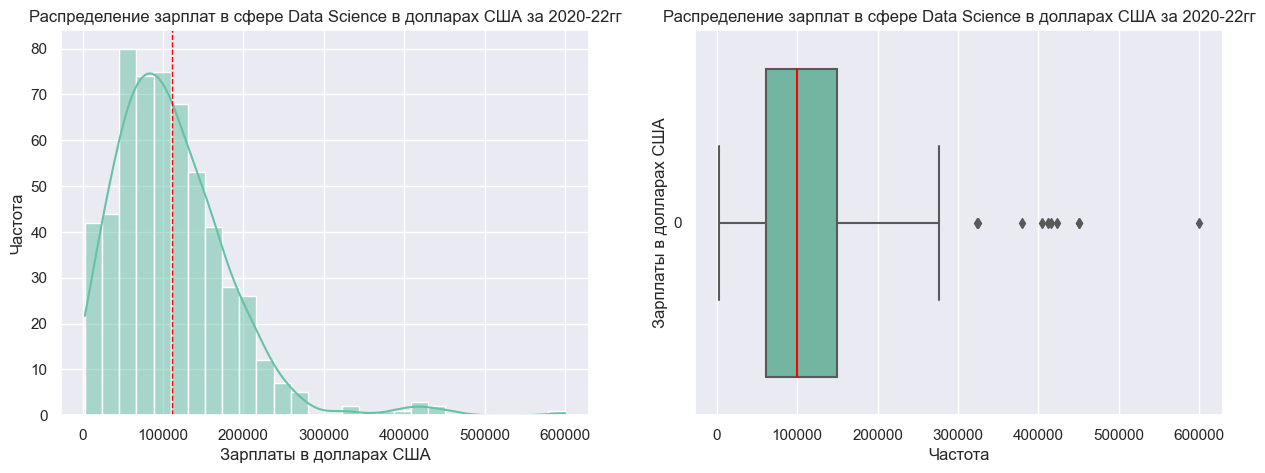

In [152]:
# Зададим размер для двух расположенных рядом графиков:

fig, axes = plt.subplots(1, 2, figsize = (15, 5))

# Создадим первый график - гистрограмму распределения; устанавливаем параметр kde = True, чтобы вычислить оценку плотности ядра, 
# чтобы сгладить распределение и отобразить на графике в виде линии:

sns.histplot(data['salary_in_usd'], kde = True, ax = axes[0])

# Подпишем график и оси:

axes[0].set_title('Распределение зарплат в сфере Data Science в долларах США за 2020-22гг')
axes[0].set(xlabel = 'Зарплаты в долларах США', ylabel = 'Частота')

# Визуально обозначим среднее значение зарплат на графике в виде вертикальной пунктирной линии:

axes[0].axvline(data['salary_in_usd'].mean(), color = 'red', linestyle = '--', linewidth = 1)

# Второй график - коробчатая диаграмма распределения зарплат; на нем красной вертикальной линией обозначим медианное значение:

sns.boxplot(data['salary_in_usd'], ax = axes[1], orient = 'h', medianprops = {'color': 'red','linestyle': '-'})

# Подпишем график и оси:

axes[1].set(xlabel = 'Частота', ylabel = 'Зарплаты в долларах США')
axes[1].set_title('Распределение зарплат в сфере Data Science в долларах США за 2020-22гг')

plt.show()


*Вывод по графику: распределение немного приближено к нормальному, но есть выбросы (начиная от 300 000 долларов США). Медианное значение практически равно среднему - 100 000 долларов США.*

* Распределение признака "Год, в котором была выплачена зарплата" (числовой признак)

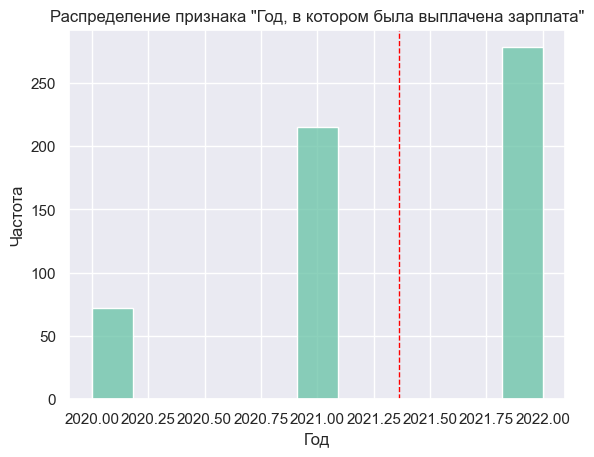

In [153]:
# Построим гистограмму:

ax = sns.histplot(data['work_year'])

# Подпишем график и оси:

plt.title('Распределение признака "Год, в котором была выплачена зарплата"')
ax.set(xlabel = 'Год', ylabel = 'Частота')

# Визуально обозначим среднее значение зарплат на графике в виде вертикальной пунктирной линии:

ax.axvline(data['work_year'].mean(), color = 'red', linestyle = '--', linewidth = 1)
plt.show()

*Вывод по графику: количество соискателей все больше с каждым годом.*

* Распределение признака "Опыт работы на должности в течение года" (категориальный признак)

In [154]:
# Чтобы визуально оценить распределение опыта работы построим гистограммы c помощью метода px.histogram библиотеки plotly.express. 
# Выставим параметр text_auto = True, чтобы на графике отобразить количество записей для каждой категории:

fig = px.histogram(data, x = 'experience_level', title = 'Распределение признака "Опыт работы на должности в течение года"', 
                   labels = {'experience_level': 'Опты работы'}, text_auto = True, color = 'experience_level', 
                   color_discrete_sequence = px.colors.qualitative.Set2)
fig.update_layout(xaxis_title_text = 'Опыт работы', yaxis_title_text='Количество')
fig.show()

*Вывод по графику: больше всего в датасете специалистов с категорией опыта работы SE (Senior-level/Expert), меньше всего - EX (Executive-level/Director).*


* Распределение признака "Тип трудоустройства" (категориальный признак)

In [155]:
# Аналогично построим гистограмму распределения типа трудоустройства:

fig = px.histogram(data, x = 'employment_type', title = 'Распределение признака "Тип трудоустройства"', 
                   labels = {'employment_type': 'Тип трудоустройства'}, text_auto = True, color = 'employment_type', 
                   color_discrete_sequence = px.colors.qualitative.Set2)
fig.update_layout(xaxis_title_text = 'Тип трудоустройства', yaxis_title_text='Количество')
fig.show()

*Вывод по графику: подавляющие большинство специалистов работают по графику FT (полный рабочий день), поэтому данный признак может не иметь влияния на заработную плату в сфере Data Science, и его можно не использовать в исследовании.*

* Распределение признака "Роль, в которой соискатель работал в течение года" (категориальный признак)

In [156]:
# Опрелелим, сколько всего ролей в датасете и сколько людей их занимают:

job_title_counts = data['job_title'].value_counts()
job_title_counts = pd.DataFrame(job_title_counts)
display(job_title_counts)

# Построим гистограмму распределения ТОП-10 ролей соискателей:

job_title_hist = job_title_counts.head(10)
fig = px.histogram(job_title_hist, x = job_title_hist.index, y = 'job_title', title = 'Распределение признака "ТОП-10 ролей, в которых соискатели работали в течение года"', 
                   labels = {'job_title': 'Роль соискателя'}, text_auto = True, color = 'job_title', 
                   color_discrete_sequence = px.colors.qualitative.Set2)
fig.update_layout(xaxis_title_text = 'Роль соискателя', yaxis_title_text='Количество', showlegend = False)
fig.show()

,job_title
Data Scientist,130
Data Engineer,121
Data Analyst,82
Machine Learning Engineer,39
Research Scientist,16
Data Science Manager,12
Data Architect,11
Big Data Engineer,8
Machine Learning Scientist,8
Principal Data Scientist,7


*Вывод по графику: самые популярные профессии в сфере Data Science за 2020-2022 гг. - Data Scientist (130 человек), Data Engineer (121 человек), Data Analyst (82 человека).*

* Распределение признака "Основная страна проживания сотрудника в течение рабочего года в виде кода страны ISO 3166" (категориальный признак)

In [157]:
# Опрелелим, сколько всего стран в датасете и сколько сотрудников в них проживают:

employee_residence_counts = data['employee_residence'].value_counts().to_frame()
display(employee_residence_counts)

# Построим гистограмму распределения ТОП-10 стран проживания:
employee_residence_hist = employee_residence_counts.head(10)

fig = px.histogram(employee_residence_hist, x = employee_residence_hist.index, y = 'employee_residence', 
                   title = 'Распределение признака "Основная страна проживания сотрудника в течение рабочего года"', 
                   labels = {'employee_residence': 'Страна проживания'}, text_auto = True, color = 'employee_residence', 
                   color_discrete_sequence = px.colors.qualitative.Set2)
fig.update_layout(xaxis_title_text = 'Страна проживания', yaxis_title_text='Частота')
fig.show()

,employee_residence
US,295
GB,43
IN,30
CA,27
DE,24
FR,18
ES,15
GR,12
JP,7
PT,6


*Вывод по графику: больше всего сотрудников из выборки (более половины списка) проживает в US (Соединенные Штаты).*

* Распределение признака "Общий объём работы, выполняемой удалённо" (категориальный признак)

In [158]:
# Построим гистограмму распределения объема работы, выполняемой удаленно:

fig = px.histogram(data, x = 'remote_ratio', title = 'Распределение признака "Общий объём работы, выполняемой удалённо"', 
                   labels = {'remote_ratio': 'Общий объём работы, выполняемой удалённо'}, text_auto = True, color = 'remote_ratio',
                   color_discrete_sequence = px.colors.qualitative.Set2)
fig.update_layout(xaxis_title_text = 'Общий объём работы, выполняемой удалённо', yaxis_title_text='Количество')
fig.show()

*Вывод по графику: более половины сотрудников (346 человек) выполняет всю свою работу удаленно. 121 человек вообще не работают в удаленном формате.*

* Распределение признака "Страна главного офиса работодателя или филиала по контракту в виде кода страны ISO 3166" (категориальный признак)

In [159]:
# Опрелелим, сколько всего стран в датасете и сколько офисов в них расположено:

company_location_counts = data['company_location'].value_counts().to_frame()
display(company_location_counts)

# Построим гистограмму распределения ТОП-10 стран проживания:
company_location_hist = company_location_counts.head(10)

fig = px.histogram(company_location_hist, x = company_location_hist.index, y = 'company_location', 
                   title = 'Распределение признака "Страна главного офиса работодателя или филиала по контракту в виде кода страны ISO 3166"', 
                   labels = {'company_location': 'Страна нахождения офиса работодателя'}, text_auto = True, color = 'company_location', 
                   color_discrete_sequence = px.colors.qualitative.Set2)
fig.update_layout(xaxis_title_text = 'Страна нахождения офиса работодателя', yaxis_title_text='Количество работодателей')
fig.show()

,company_location
US,318
GB,46
CA,28
DE,27
IN,24
FR,15
ES,14
GR,10
JP,6
NL,4


*Вывод по графику: более половины офисов работодателей (318 шт.) расположено в US (Соединенные Штаты)*

* Распределение признака "Среднее количество людей, работавших в компании в течение года" (категориальный признак)

In [160]:
# Построим гистограмму распределения среднего количества людей, которые работали в компании в течение года:

fig = px.histogram(data, x = 'company_size', title = 'Распределение признака "Среднее количество людей, работавших в компании в течение года"', 
                   labels = {'company_size': 'Среднее количество людей, работавших в компании в течение года'}, text_auto = True, color = 'company_size',
                   color_discrete_sequence = px.colors.qualitative.Set2)
fig.update_layout(xaxis_title_text = 'Обозначение среднего количества людей', yaxis_title_text = 'Частота')
fig.show()

*Вывод по графику: больше всего компаний, где среднее количество сотрудников - M - от 50 до 250 сотрудников (средняя компания). Меньше всего - небольших компаний размера S (менее 50 сотрудников).*

#### 4.1.2. Построение визуализаций влияния признаков на зарплату по всем наименованиям Data Scientist или на зарплату по всем должностям

* ЗАВИСИМОСТЬ ЗАРПЛАТ СПЕЦИАЛИСТОВ DATA SCIENTIST ОТ ГОДА, В КОТОРОМ БЫЛА ВЫПЛАЧЕНА ЗАРПЛАТА

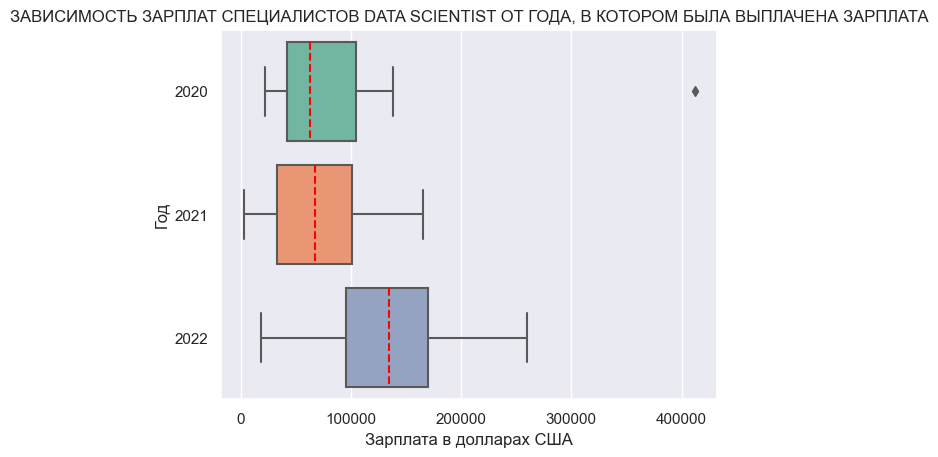

In [161]:
# Чтобы предварительно ответить на вопрос "Наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?" проведем визуальный анализ.
# Подготовим данные для исследования - отфильтруем датасет по профессии Data Scientist:

data_DS = data[data['job_title'] == 'Data Scientist']

# Построим коробчатые диаграмы, чтобы понять, есть ли зависимость между признаками, и можно ли предварительно ответить на вопрос - 
# растут ли зарплаты Data Sientist-ов с каждым годом:

ax = sns.boxplot(data_DS, x = 'salary_in_usd', y = 'work_year', orient = 'h', medianprops = {'color' : 'red', 'linestyle' : '--'})
ax.set(xlabel = 'Зарплата в долларах США', ylabel = 'Год')
plt.title('ЗАВИСИМОСТЬ ЗАРПЛАТ СПЕЦИАЛИСТОВ DATA SCIENTIST ОТ ГОДА, В КОТОРОМ БЫЛА ВЫПЛАЧЕНА ЗАРПЛАТА')
plt.show()


In [162]:
# Выведем описательную статистику:

data_DS_work_year = data_DS.groupby('work_year')['salary_in_usd'].describe().round(2)
print('ЗАВИСИМОСТЬ ЗАРПЛАТ СПЕЦИАЛИСТОВ DATA SCIENTIST ОТ ГОДА, В КОТОРОМ БЫЛА ВЫПЛАЧЕНА ЗАРПЛАТА')
data_DS_work_year

ЗАВИСИМОСТЬ ЗАРПЛАТ СПЕЦИАЛИСТОВ DATA SCIENTIST ОТ ГОДА, В КОТОРОМ БЫЛА ВЫПЛАЧЕНА ЗАРПЛАТА


,count,mean,std,min,25%,50%,75%,max
work_year,,,,,,,,
2020,21.0,85970.52,81436.65,21669.0,42197.00,62726.0,105000.00,412000.0
2021,44.0,70215.77,45843.82,2859.0,32793.75,67233.5,100922.75,165000.0
2022,65.0,131366.94,55785.24,18442.0,95550.00,135000.0,170000.00,260000.0


*Выводы: можно отметить рост медианной и средней зарплаты с 2020 по 2022 гг. Особенно виден рост зарплат в 2022 году, где нижний квантиль немного меньше, чем верхний в 2020 и 2021 году.*

*Также отметим выброс в 2020 году - зарплата 412 000 долларов.*

* СООТНОШЕНИЕ ЗАРПЛАТ СПЕЦИАЛИСТОВ DATA SCIENTIST И DATA ENGINEER В 2022 ГОДУ

In [163]:
# Чтобы предварительно ответить на вопрос "Как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?" проведем визуальный анализ.
# Подоговим данные для исследования - отфильтруем датасет по профессиям Data Scientist и Data Engineer и по 2022 году. Используем 
# для этого маски:

mask1 = data['work_year'] == 2022
mask2 = (data['job_title'] == 'Data Scientist') | (data['job_title'] == 'Data Engineer')
data_DS_DE_2022 = data[mask1][mask2]

# Построим гистраграмму распределения:

fig = px.histogram(data_DS_DE_2022, x = 'job_title', y = 'salary_in_usd', histfunc = 'avg',
                   title = 'СООТНОШЕНИЕ ЗАРПЛАТ СПЕЦИАЛИСТОВ DATA SCIENTIST И DATA ENGINEER В 2022 ГОДУ', 
                   labels = {'job_title': 'Должность', 'salary_in_usd': 'Зарплата в долларах США'}, 
                   text_auto = True, color = 'job_title',
                   color_discrete_sequence = px.colors.qualitative.Set2)
fig.show()

C:\Users\anupa\AppData\Local\Temp\ipykernel_12028\4009897989.py:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



In [164]:
# выведем описательную статистику:

data_DS_DE_2022_job_title = data_DS_DE_2022.groupby('job_title')['salary_in_usd'].describe().round(2)
print('СООТНОШЕНИЕ ЗАРПЛАТ СПЕЦИАЛИСТОВ DATA SCIENTIST И DATA ENGINEER')
data_DS_DE_2022_job_title

СООТНОШЕНИЕ ЗАРПЛАТ СПЕЦИАЛИСТОВ DATA SCIENTIST И DATA ENGINEER


,count,mean,std,min,25%,50%,75%,max
job_title,,,,,,,,
Data Engineer,79.0,124651.78,57846.84,25000.0,78526.0,115000.0,160040.0,324000.0
Data Scientist,65.0,131366.94,55785.24,18442.0,95550.0,135000.0,170000.0,260000.0


*Выводы: средняя зарплата у Data Scientist в 2022 году примерно на 7 000 долларов больше, чем у Data Engineer.*

* СООТНОШЕНИЕ ЗАРПЛАТ СПЕЦИАЛИСТОВ DATA SCIENTIST В КОМПАНИЯХ РАЗНЫХ РАЗМЕРОВ

In [165]:
# Чтобы предварительно ответить на вопрос "Как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?" 
# проведем визуальный анализ.
# Используем для исследования датасет data_DS, отфильтрованный по профессии Data Scientist.
# Построим гистограмму распределения средних значений зарплат salary_in_usd в зависимости от размера компаний company_size:

fig = px.histogram(data_DS, x = 'company_size', y = 'salary_in_usd', histfunc='avg', 
                   title = '', 
                   labels = {'company_size': 'Размер компании', 'salary_in_usd': 'Зарплата в долларах США'}, 
                   text_auto = True, color = 'company_size',
                   color_discrete_sequence = px.colors.qualitative.Set2)
fig.show()

In [166]:
# Выведем описательную статистику:

data_DS_comp_size = data_DS.groupby('company_size')['salary_in_usd'].describe().round(2)
print('СООТНОШЕНИЕ ЗАРПЛАТ СПЕЦИАЛИСТОВ DATA SCIENTIST В КОМПАНИЯХ РАЗНЫХ РАЗМЕРОВ')
data_DS_comp_size

СООТНОШЕНИЕ ЗАРПЛАТ СПЕЦИАЛИСТОВ DATA SCIENTIST В КОМПАНИЯХ РАЗНЫХ РАЗМЕРОВ


,count,mean,std,min,25%,50%,75%,max
company_size,,,,,,,,
L,43.0,102743.42,73254.10,13400.0,45240.5,90734.0,135000.0,412000.0
M,66.0,120080.58,56347.79,4000.0,80000.0,119529.5,157500.0,260000.0
S,21.0,51925.76,33216.29,2859.0,21669.0,49268.0,82500.0,105000.0


*Выводы: максимальная средняя зарплата у Data Scientist в средних компаниях размера M (от 50 до 250 сотрудников). В небольших компаниях S (менее 50 сотрудников) зарплата более чем в 2 раза меньше по сравнению со средними компаниями. Это может быть связано с отстутсвием соответствующего финансирования, поскольку у небольших компаний заказчиков и контрактов меньше нежели у больших и средних организаций.*

* ЗАВИСИМОСТЬ ЗАРПЛАТ СПЕЦИАЛИСТОВ В СФЕРЕ DATA SCIENCE (ПО ВСЕМ ДОЛЖНОСТЯМ) ОТ ОПЫТА РАБОТЫ НА ЭТОЙ ДОЛЖНОСТИ В ТЕЧЕНИЕ ГОДА

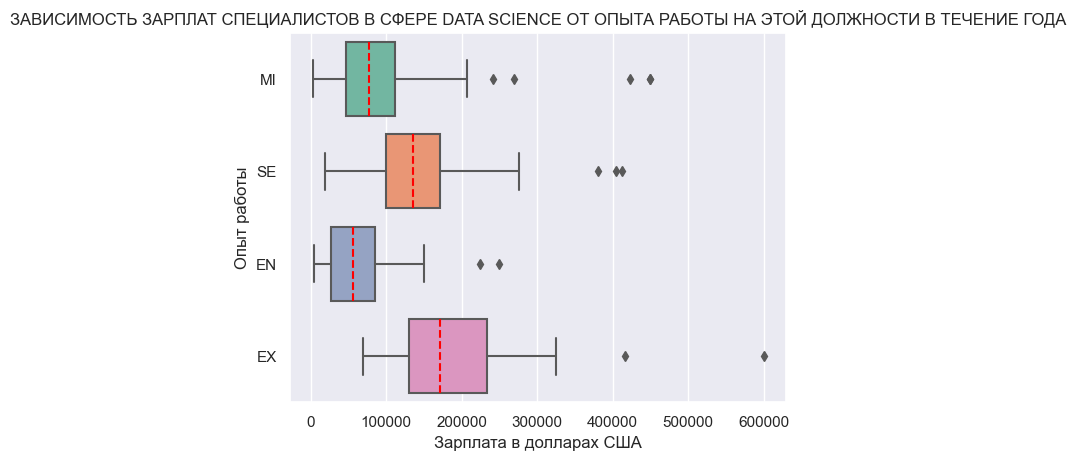

In [167]:
# Построим коробчатую диаграмму распределения:

ax = sns.boxplot(data, x = 'salary_in_usd', y = 'experience_level', orient = 'h', medianprops = {'color' : 'red', 'linestyle' : '--'})
ax.set(xlabel = 'Зарплата в долларах США', ylabel = 'Опыт работы')
plt.title('ЗАВИСИМОСТЬ ЗАРПЛАТ СПЕЦИАЛИСТОВ В СФЕРЕ DATA SCIENCE ОТ ОПЫТА РАБОТЫ НА ЭТОЙ ДОЛЖНОСТИ В ТЕЧЕНИЕ ГОДА')
plt.show()

In [168]:
# Выведем описательную статистику:

data_exp_level = data.groupby('experience_level')['salary_in_usd'].describe().round(2)
print('ЗАВИСИМОСТЬ ЗАРПЛАТ СПЕЦИАЛИСТОВ В СФЕРЕ DATA SCIENCE ОТ ОПЫТА РАБОТЫ НА ЭТОЙ ДОЛЖНОСТИ В ТЕЧЕНИЕ ГОДА')
data_exp_level

ЗАВИСИМОСТЬ ЗАРПЛАТ СПЕЦИАЛИСТОВ В СФЕРЕ DATA SCIENCE ОТ ОПЫТА РАБОТЫ НА ЭТОЙ ДОЛЖНОСТИ В ТЕЧЕНИЕ ГОДА


,count,mean,std,min,25%,50%,75%,max
experience_level,,,,,,,,
EN,88.0,61643.32,44395.54,4000.0,27505.00,56500.0,85425.75,250000.0
EX,26.0,199392.04,117071.26,69741.0,130006.50,171437.5,233750.00,600000.0
MI,208.0,87793.00,64118.97,2859.0,47163.75,76940.0,112075.00,450000.0
SE,243.0,138374.88,59955.97,18907.0,99531.50,135000.0,171881.00,412000.0


*Выводы: самая маленькая медианная и средняя зарплата у специалистов с минимальным опытом работы - EN (Entry-level/Junior), самая большая - у EX (Executive-level/Director - высшие должности в организациях).*

*Таким образом, признак опыта работы однозначно влияет на размер заработной платы в сфере Data Science*

* ЗАВИСИМОСТЬ ЗАРПЛАТ СПЕЦИАЛИСТОВ В СФЕРЕ DATA SCIENCE (ПО ВСЕМ ДОЛЖНОСТЯМ) ОТ ТИПА ТРУДОУСТРОЙСТВА ДЛЯ ЭТОЙ РОЛИ

Поскольку практически у всех соискателей тип трудоустройства - FT (полный рабочий день), данный признак не будет участвовать в исследовании, соответственно визуальный анализ не выполнялся.

* СООТНОШЕНИЕ ЗАРПЛАТ СПЕЦИАЛИСТОВ В СФЕРЕ DATA SCIENCE

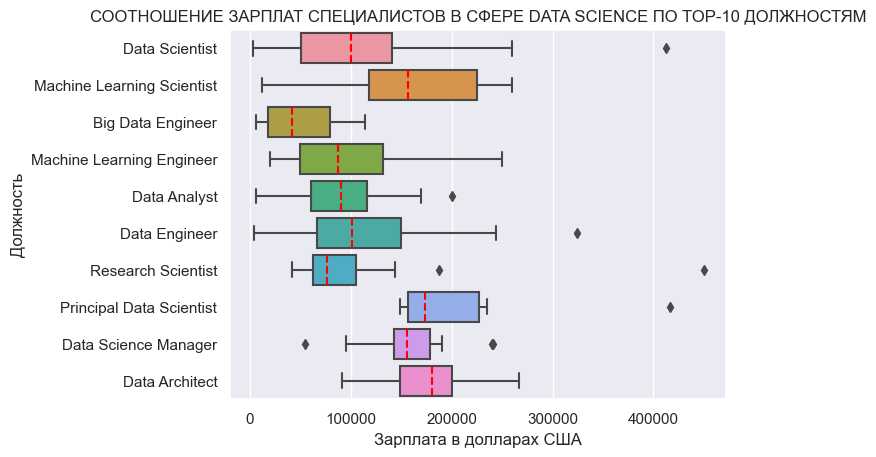

In [169]:
# Поскольку должностей в датасете много, и визуально оценить соотношение зарплат по всем ролям не представляется возможным, отберем 
# только те строки, где должность входит в список ТОП-10 самых популярных ролей соискателей в датасете:

data_job_title_top10 = data[data['job_title'].isin(['Data Scientist', 'Data Engineer', 'Data Analyst', 'Machine Learning Engineer', 
                                                 'Research Scientist', 'Data Science Manager', 'Data Architect', 'Big Data Engineer',
                                                 'Machine Learning Scientist', 'Principal Data Scientist'])]

# Построим коробчатую диаграмму распределения:

ax = sns.boxplot(data_job_title_top10, x = 'salary_in_usd', y = 'job_title', orient = 'h', medianprops = {'color' : 'red', 'linestyle' : '--'})
ax.set(xlabel = 'Зарплата в долларах США', ylabel = 'Должность')
plt.title('СООТНОШЕНИЕ ЗАРПЛАТ СПЕЦИАЛИСТОВ В СФЕРЕ DATA SCIENCE ПО TOP-10 ДОЛЖНОСТЯМ')
plt.show()

In [170]:
# Выведем описательную статистику:

data_job_title = data_job_title_top10.groupby('job_title')['salary_in_usd'].describe().round(2)
print('СООТНОШЕНИЕ ЗАРПЛАТ СПЕЦИАЛИСТОВ В СФЕРЕ DATA SCIENCE ПО TOP-10 ДОЛЖНОСТЯМ')
data_job_title

СООТНОШЕНИЕ ЗАРПЛАТ СПЕЦИАЛИСТОВ В СФЕРЕ DATA SCIENCE ПО TOP-10 ДОЛЖНОСТЯМ


,count,mean,std,min,25%,50%,75%,max
job_title,,,,,,,,
Big Data Engineer,8.0,51974.00,42954.76,5882.0,17557.00,41305.5,79756.0,114047.0
Data Analyst,82.0,90089.60,40686.26,6072.0,60325.00,90000.0,116112.5,200000.0
Data Architect,11.0,177873.91,45714.72,90700.0,148900.00,180000.0,200669.5,266400.0
Data Engineer,121.0,109750.03,58203.68,4000.0,66022.00,100800.0,150000.0,324000.0
Data Science Manager,12.0,158328.50,52589.18,54094.0,142285.25,155750.0,178050.0,241000.0
Data Scientist,130.0,103336.35,63967.56,2859.0,50330.25,100000.0,140400.0,412000.0
Machine Learning Engineer,39.0,101165.13,62518.56,20000.0,49173.00,87425.0,131500.0,250000.0
Machine Learning Scientist,8.0,158412.50,79514.71,12000.0,118075.00,156500.0,225000.0,260000.0
Principal Data Scientist,7.0,215242.43,94705.04,148261.0,156837.00,173762.0,227500.0,416000.0


*Выводы: основываясь на отобранных данных, можно сделать вывод, что самая высокая зарплата у Principal Data Scientist, самая низкая - у Big Data Engineer. Обе должности не самые популярные, в датасете их всего 7 и 8 шт. соответственно.*

*Если смотреть по популярным ролям - средние зарплаты Data Scientist и Data Engineer примерно одинаковые (103 336.35 долларов и 109 750.03 долларов), а у Data Analyst меньше на 13-20 тыс. долларов (90 089.60	)*

*Таким образом, роль соискателя однозначно влияет на заработную плату.*

* ЗАВИСИМОСТЬ ЗАРПЛАТ СПЕЦИАЛИСТОВ В СФЕРЕ DATA SCIENCE (ПО ВСЕМ ДОЛЖНОСТЯМ) ОТ СТРАНЫ ПРОЖИВАНИЯ СОТРУДНИКА

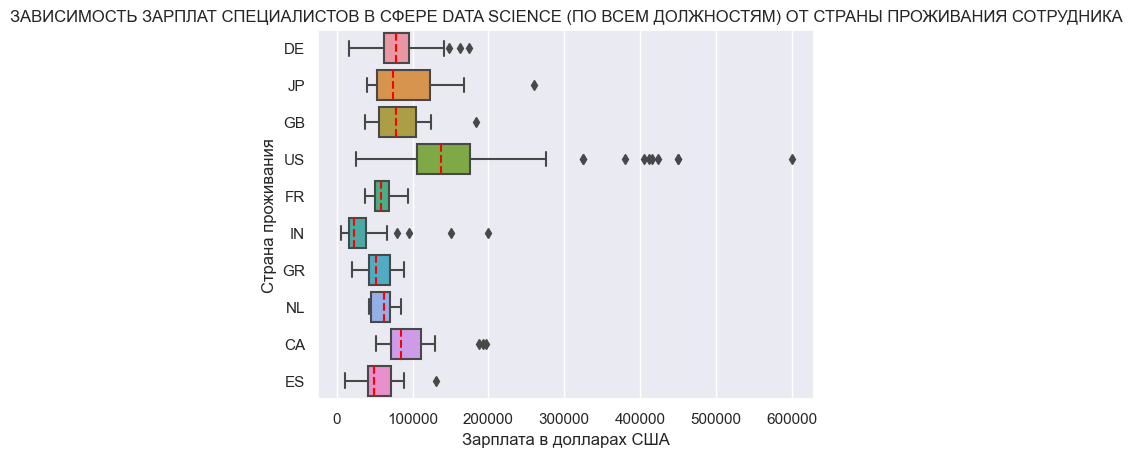

In [171]:
# Выполним исследование только для ТОП-10 популярных стран проживания. Отберем нужные данные из датасета:

data_emp_res_top10 = data[data['employee_residence'].isin(['US', 'GB', 'CA', 'DE', 'IN', 'FR', 'ES', 'GR', 'JP', 'NL'])]
# Построим коробчатую диаграмму распределения:

ax = sns.boxplot(data_emp_res_top10, x = 'salary_in_usd', y = 'employee_residence', orient = 'h', medianprops = {'color' : 'red', 'linestyle' : '--'})
ax.set(xlabel = 'Зарплата в долларах США', ylabel = 'Страна проживания')
plt.title('ЗАВИСИМОСТЬ ЗАРПЛАТ СПЕЦИАЛИСТОВ В СФЕРЕ DATA SCIENCE (ПО ВСЕМ ДОЛЖНОСТЯМ) ОТ СТРАНЫ ПРОЖИВАНИЯ СОТРУДНИКА')
plt.show()

In [172]:
# Выведем описательную статистику:

data_emp_res = data_emp_res_top10.groupby('employee_residence')['salary_in_usd'].describe().round(2)
print('ЗАВИСИМОСТЬ ЗАРПЛАТ СПЕЦИАЛИСТОВ В СФЕРЕ DATA SCIENCE (ПО ВСЕМ ДОЛЖНОСТЯМ) ОТ СТРАНЫ ПРОЖИВАНИЯ СОТРУДНИКА')
data_emp_res

ЗАВИСИМОСТЬ ЗАРПЛАТ СПЕЦИАЛИСТОВ В СФЕРЕ DATA SCIENCE (ПО ВСЕМ ДОЛЖНОСТЯМ) ОТ СТРАНЫ ПРОЖИВАНИЯ СОТРУДНИКА


,count,mean,std,min,25%,50%,75%,max
employee_residence,,,,,,,,
CA,27.0,97191.63,40151.79,52000.0,71349.00,85000.0,110397.50,196979.0
DE,24.0,85336.67,40215.64,15966.0,62411.25,78015.0,94859.50,173762.0
ES,15.0,57593.40,28395.03,10354.0,41371.00,49461.0,71444.50,130800.0
FR,18.0,59886.61,15848.69,36643.0,49734.50,57920.0,69342.50,93427.0
GB,43.0,81470.07,30283.75,37300.0,55247.00,78526.0,103931.00,183228.0
GR,12.0,56445.75,21544.77,20000.0,43021.75,52209.0,70556.00,88654.0
IN,30.0,37322.33,43741.19,5409.0,16397.00,22124.0,38812.75,200000.0
JP,7.0,103537.71,81283.30,40000.0,52700.00,74000.0,122682.00,260000.0
NL,5.0,60956.60,17746.57,42000.0,45391.00,62651.0,69741.00,85000.0


*Выводы: самая высокая средняя и медианная зарплата у сотрудников из США (US). Также большая часть сотрудников в датасете из США. Как известно, Соединённые Штаты занимают высокие позиции в мире по ряду социально-экономических показателей, включая среднюю зарплату.*

*Самая маленькая зарплата(на основании оторбранных данных) у сотрудников из Индии (IN). В Индии существует большое расслоение населения, четверть страны живёт ниже установленного государством прожиточного минимума.*

*Таким образом, признак страны проживания сотрудника влияет на заработную плату. Также можно проверить гипотезу, что у сотрудников из развитых стран заработная плата больше, чем у сотрудников из развивающихся.*

* ЗАВИСИМОСТЬ ЗАРПЛАТ СПЕЦИАЛИСТОВ В СФЕРЕ DATA SCIENCE (ПО ВСЕМ ДОЛЖНОСТЯМ) ОТ ОБЩЕГО ОБЪЕМА РАБОТЫ, ВЫПОЛНЯЕМОЙ УДАЛЕННО

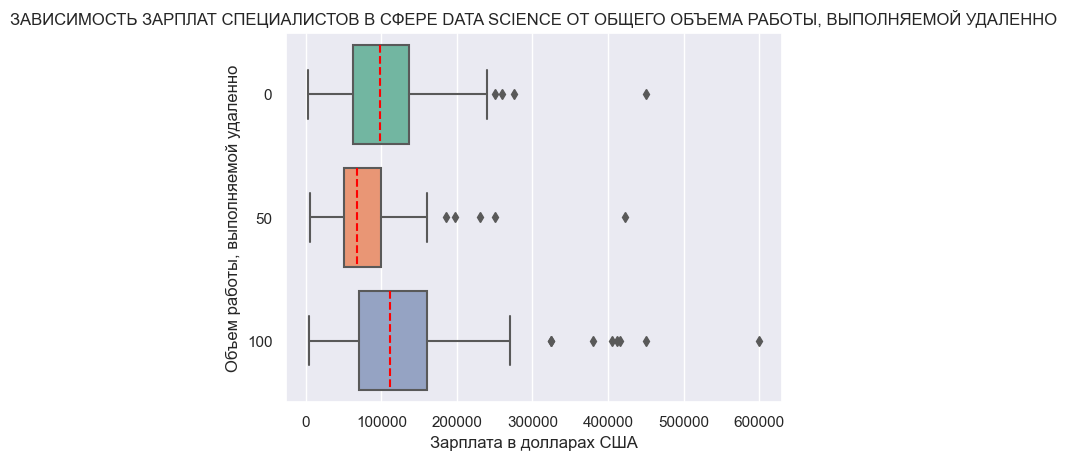

In [173]:
# Построим коробчатую диаграмму распределения:

ax = sns.boxplot(data, x = 'salary_in_usd', y = 'remote_ratio', orient = 'h', medianprops = {'color' : 'red', 'linestyle' : '--'})
ax.set(xlabel = 'Зарплата в долларах США', ylabel = 'Объем работы, выполняемой удаленно')
plt.title('ЗАВИСИМОСТЬ ЗАРПЛАТ СПЕЦИАЛИСТОВ В СФЕРЕ DATA SCIENCE ОТ ОБЩЕГО ОБЪЕМА РАБОТЫ, ВЫПОЛНЯЕМОЙ УДАЛЕННО')
plt.show()

In [174]:
# Выведем описательную статистику:

data_remote_ratio = data_emp_res_top10.groupby('remote_ratio')['salary_in_usd'].describe().round(2)
print('ЗАВИСИМОСТЬ ЗАРПЛАТ СПЕЦИАЛИСТОВ В СФЕРЕ DATA SCIENCE ОТ ОБЩЕГО ОБЪЕМА РАБОТЫ, ВЫПОЛНЯЕМОЙ УДАЛЕННО')
data_remote_ratio

ЗАВИСИМОСТЬ ЗАРПЛАТ СПЕЦИАЛИСТОВ В СФЕРЕ DATA SCIENCE ОТ ОБЩЕГО ОБЪЕМА РАБОТЫ, ВЫПОЛНЯЕМОЙ УДАЛЕННО


,count,mean,std,min,25%,50%,75%,max
remote_ratio,,,,,,,,
0,102.0,117056.91,66850.11,5882.0,72236.50,107530.0,147961.5,450000.0
50,72.0,86063.47,59602.01,5409.0,54777.25,71562.0,109006.0,423000.0
100,302.0,129422.25,74472.03,5679.0,80000.00,120000.0,165000.0,600000.0


*Выводы: самая высокая зарплата у сотрудников, кто полностью выполняет свою работу удаленно. По всей видимости, это удобно и выгодно для работадателя - можно не платить за аренду офиса и коммунальные услуги помещения для работы сотрудника.*

*На втором месте по заработной плате сотрудники, кто полностью работает в офисе. Менее всего ценится гибридный график (где работа выполняется наполовину дома, наполовину в офисе).*

*Таким образом, объем работы, выполняемой удаленно, влияет на заработную плату специалистов в сфере Data Science.*

* ЗАВИСИМОСТЬ ЗАРПЛАТ СПЕЦИАЛИСТОВ В СФЕРЕ DATA SCIENCE (ПО ВСЕМ ДОЛЖНОСТЯМ) ОТ СТРАНЫ НАХОЖДЕНИЯ ОФИСА РАБОТОДАТЕЛЯ

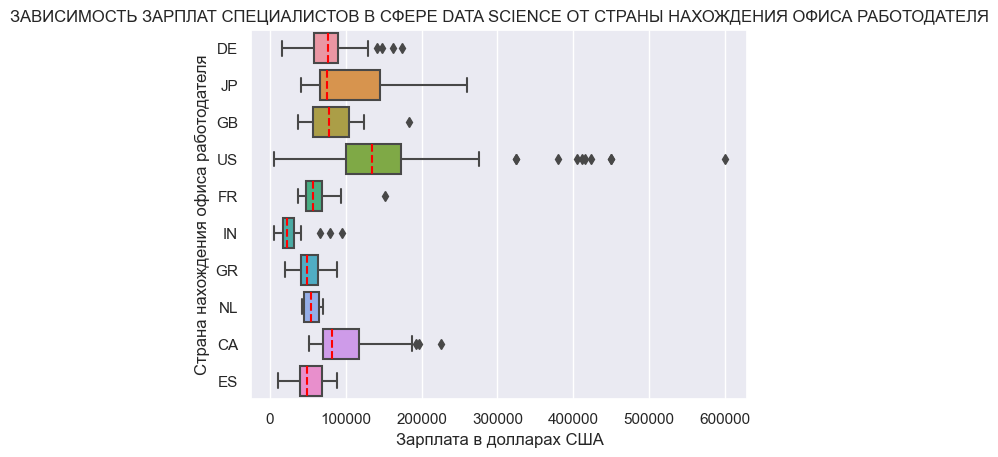

In [175]:
# Поскольку стран в датасете достаточно много, для более наглядного визуального анализа используем только ТОП-10 стран:

data_comp_loc_top10 = data[data['company_location'].isin(['US', 'GB', 'CA', 'DE', 'IN', 'FR', 'ES', 'GR', 'JP', 'NL'])]

# Построим коробчатую диаграмму распределения:

ax = sns.boxplot(data_comp_loc_top10, x = 'salary_in_usd', y = 'company_location', orient = 'h', medianprops = {'color' : 'red', 'linestyle' : '--'})
ax.set(xlabel = 'Зарплата в долларах США', ylabel = 'Страна нахождения офиса работодателя')
plt.title('ЗАВИСИМОСТЬ ЗАРПЛАТ СПЕЦИАЛИСТОВ В СФЕРЕ DATA SCIENCE ОТ СТРАНЫ НАХОЖДЕНИЯ ОФИСА РАБОТОДАТЕЛЯ')
plt.show()

In [176]:
# Выведем описательную статистику:

data_comp_loc = data_comp_loc_top10.groupby('company_location')['salary_in_usd'].describe().round(2)
print('ЗАВИСИМОСТЬ ЗАРПЛАТ СПЕЦИАЛИСТОВ В СФЕРЕ DATA SCIENCE ОТ СТРАНЫ НАХОЖДЕНИЯ ОФИСА РАБОТОДАТЕЛЯ')
data_comp_loc

ЗАВИСИМОСТЬ ЗАРПЛАТ СПЕЦИАЛИСТОВ В СФЕРЕ DATA SCIENCE ОТ СТРАНЫ НАХОЖДЕНИЯ ОФИСА РАБОТОДАТЕЛЯ


,count,mean,std,min,25%,50%,75%,max
company_location,,,,,,,,
CA,28.0,100121.86,47080.71,52000.0,70518.00,81895.5,117374.75,225000.0
DE,27.0,81559.56,39903.44,15966.0,58669.00,76833.0,89694.00,173762.0
ES,14.0,53060.14,21090.92,10354.0,40073.50,48371.5,68793.00,87932.0
FR,15.0,63970.67,28679.63,36643.0,48202.50,56738.0,69143.00,152000.0
GB,46.0,81649.50,29846.70,37300.0,56915.50,78526.0,104316.50,183228.0
GR,10.0,52026.70,20357.15,20000.0,41133.25,48680.0,63201.00,87932.0
IN,24.0,28581.75,22697.67,5409.0,16735.00,22124.0,32163.25,94665.0
JP,6.0,114127.33,83584.64,41689.0,66283.25,75682.0,145341.00,260000.0
NL,4.0,54945.75,13381.03,42000.0,44543.25,54021.0,64423.50,69741.0


*Выводы: медианная и средняя зарплата больше в организациях, которые находятся в США (US), также больше половины работодателей из всего датасета расположено в США.*

*Самая маленькая зарплата в офисах в Индии. Аналогичные выводы были получены при анализе стран проживания сотрудников.*

*Дополнительно можно провести статистический анализ, чтобы проверить гипотезу - действительно ли в развитых странах зарплата у сотрудников выше, чем в развивающихся.*

* СООТНОШЕНИЕ ДОЛЖНОСТЕЙ DATA SCIENTIST И DATA ENGINEER В КОМПАНИЯХ РАЗНЫХ РАЗМЕРОВ

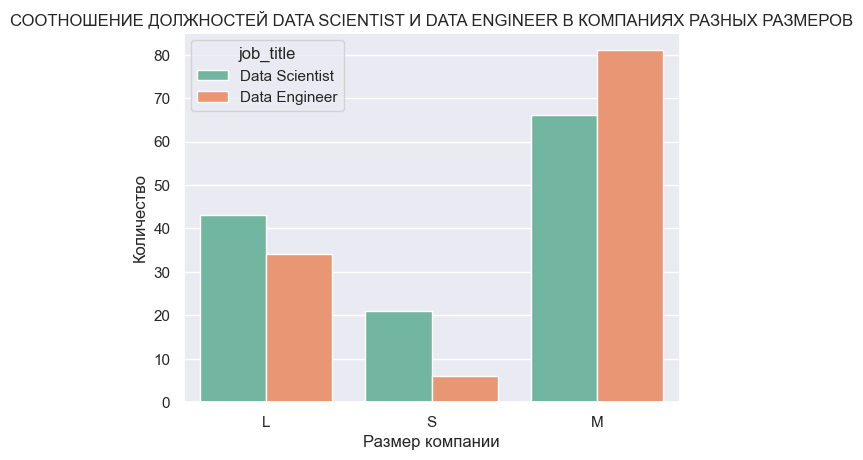

In [177]:
# Отберем данные в датасете по должностям Data Scientist и Data Engineer:

data_DS_DE = data[data['job_title'].isin(['Data Scientist', 'Data Engineer'])]

# Построим столбчатую диаграмму соотношения с помощью функции countplot() библиотеки seaborn:

ax = sns.countplot(data = data_DS_DE, x = data_DS_DE['company_size'], hue = 'job_title')
ax.set(xlabel = 'Размер компании', ylabel = 'Количество')
plt.title('СООТНОШЕНИЕ ДОЛЖНОСТЕЙ DATA SCIENTIST И DATA ENGINEER В КОМПАНИЯХ РАЗНЫХ РАЗМЕРОВ')
plt.show()

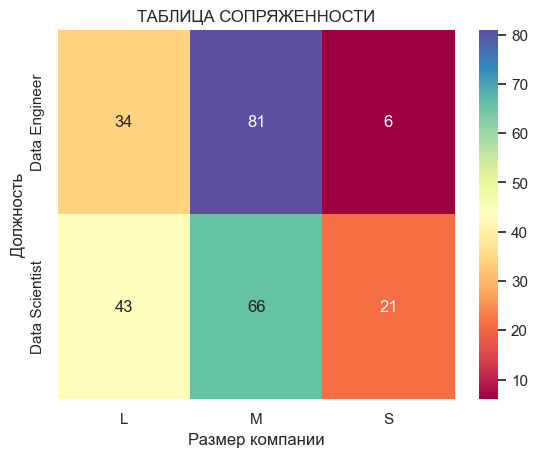

In [178]:
# Дополнительно составим таблицу сопряженности с помощью функции pd.crosstab и построим тепловую карту:

cross_tab = pd.crosstab(index = data_DS_DE['job_title'], columns = data_DS_DE['company_size'])
ax = sns.heatmap(cross_tab, annot = True, cmap='Spectral')
ax.set(xlabel = 'Размер компании', ylabel = 'Должность')
plt.title('ТАБЛИЦА СОПРЯЖЕННОСТИ')
plt.show()

*Выводы: в компаниях размера M (средние организации) количество специалистов Data Scientist и Data Engineer больше, чем в остальных компаниях.*

*В компаниях размеров S и L (небольшие и крупные организации) количество Data Scientist-ов больше, чем Data Engineer-ов. И только в компаниях М наоборот.*

*Чтобы определить, являются ли эти различия статистически значимыми, далее будут проведены статистические тесты.*

____

Общий вывод по п. 4:
Таким образом на зарплату специалистов в сфере Data Science влияют следующие факторы:

1. Год, в котором была выплачена зарплата. Предварительно можно сделать вывод, что с каждым годом зарплата у специалистов Data Scientist растет.
2. Опыт работы на должности. Чем больше опыт - тем выше заработная плата. Максимальная зарплата у специалистов Executive-level/Director.
3. Роль, в которой соискатель работал в течение года - у каждой должности своя зарплатная вилка.
4. Основная страна проживания сотрудника в течение рабочего года. Максимальная зарплата у сотрудников из США.
5. Общий объём работы, выполняемой удалённо. Зарплаты у сотрудников с полностью удаленной и с полностью офисной работой выше, чем при комбинированном формате.
6. Страна главного офиса работодателя или филиала по контракту. Максимальная зарплата у сотрудников организаций из США.
7. Среднее количество людей, работавших в компании в течение года.  максимальная средняя зарплата у Data Scientist в средних компаниях размера M (от 50 до 250 сотрудников). В небольших компаниях S (менее 50 сотрудников) зарплата более чем в 2 раза меньше по сравнению со средними компаниями.

### 4.2 Статистический анализ данных

In [179]:
# Подготовим функцию для принятия решения о нормальности:

def decision_normality(p):
    print('p-value = {:.3f}.'.format(p))
    if p <= alpha:
        print('p-значение меньше, чем заданный уровень значимости {:.2f}. Распределение отлично от нормального.'.format(alpha))
    else:
        print('p-значение больше, чем заданный уровень значимости {:.2f}. Распределение является нормальным.'.format(alpha))
        
# Подготовим функцию для принятия решения об отклонении нулевой гипотезы:

def decision_hypothesis(p):
    print('p-value = {:.3f}.'.format(p))
    if p <= alpha:
        print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу в пользу альтернативной.'.format(alpha))
    else:
        print('p-значение больше, чем заданный уровень значимости {:.2f}. Нет оснований отвергнуть нулевую гипотезу'.format(alpha))

#### 4.2.1 Бизнес-вопрос: наблюдается ли ежегодный рост зарплат у специалистов Data Scientist?

**Сформулируем нулевую и альтернативную гипотезы**

*Нулевая гипотеза* ($H_0$): зарплаты у специалистов Data Scientist за 2020 ($μ_1$), 2021 ($μ_2$), 2022 ($μ_3$) года не меняются или становятся меньше.

$$ H_0 : μ_1 >= μ_2 >= μ_3$$

*Альтернативная гипотеза* ($H_1$): зарплаты у специалистов Data Scientist за 2020 ($μ_1$), 2021 ($μ_2$), 2022 ($μ_3$) года увеличиваются.

$$ H_1 : μ_1 < μ_2 < μ_3$$

**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально. Гипотезы теста Шапиро-Уилка:

*Нулевая гипотеза* ($H_0$): распределение данные является нормальным.

*Альтернативная гипотеза* ($H_1$): распределение данных отлично от нормального.

In [180]:
# Запишем в переменные значения зарплат за 2020, 2021 и 2022 года:

salary_2020 = data_DS[data_DS['work_year'] == 2020]['salary_in_usd']
salary_2021 = data_DS[data_DS['work_year'] == 2021]['salary_in_usd']
salary_2022 = data_DS[data_DS['work_year'] == 2022]['salary_in_usd']

# Проведем тест Шапиро-Уилка:

print('Для 2020 года:')
result1 = stats.shapiro(salary_2020)
decision_normality(result1[1])

print('Для 2021 года:')
result2 = stats.shapiro(salary_2021)
decision_normality(result2[1])

print('Для 2022 года:')
result3 = stats.shapiro(salary_2022)
decision_normality(result3[1])

Для 2020 года:
p-value = 0.000.
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального.
Для 2021 года:
p-value = 0.107.
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным.
Для 2022 года:
p-value = 0.676.
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным.


Поскольку хотя бы в одной группе распределение отличается от нормального, используем непараметрические тесты.

**Выбор подходящего статистического теста:**

Используем алгоритм выбора теста:

1. Какой тип признака "Зарплата в долларах США"? - ***Количественный***
2. Сколько сравниваемых групп? - ***Три***
3. Группы зависимы? - ***Нет***
4. Признак распределен по нормальному закону? - ***Нет***

Таким образом, для проверки гипотезы используем критерий Краскела-Уоллиса.

**Тест:**

In [181]:
_, p = stats.kruskal(salary_2020, salary_2021, salary_2022)
decision_hypothesis(p)

p-value = 0.000.
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


*Вывод по тесту: с каждым годом зарплата у специалистов Data Scientist растет.*

#### 4.2.2 Бизнес-вопрос: как соотносятся зарплаты Data Scientist и Data Engineer в 2022 году?

**Сформулируем нулевую и альтернативную гипотезы**

*Нулевая гипотеза* ($H_0$): зарплата у специалиста Data Scientist ($μ_1$) в 2022 году больше или равна зарплате специалиста Data Engineer ($μ_2$).

$$ H_0 : μ_1 >= μ_2$$


*Альтернативная гипотеза* ($H_1$): зарплата у специалиста Data Scientist ($μ_1$) в 2022 году меньше зарплаты специалиста Data Engineer ($μ_2$).

$$ H_0 : μ_1 < μ_2$$

**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально. Гипотезы теста Шапиро-Уилка:

*Нулевая гипотеза* ($H_0$): распределение данные является нормальным.

*Альтернативная гипотеза* ($H_1$): распределение данных отлично от нормального.

In [182]:
# Запишем в переменные значения зарплат Data Scientist и Data Engineer за 2022 год:

salary_DS_2022 = data[(data['job_title'] == 'Data Scientist') & (data['work_year'] == 2022)]['salary_in_usd']
salary_DE_2022 = data[(data['job_title'] == 'Data Engineer') & (data['work_year'] == 2022)]['salary_in_usd']

# Проведем тест Шапиро-Уилка:

print('Для Data Scientist:')
result1 = stats.shapiro(salary_DS_2022)
decision_normality(result1[1])

print('Для Data Engineer:')
result1 = stats.shapiro(salary_DE_2022)
decision_normality(result1[1])

Для Data Scientist:
p-value = 0.676.
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным.
Для Data Engineer:
p-value = 0.007.
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального.


Поскольку хотя бы в одной группе распределение отличается от нормального, используем непараметрические тесты.

**Выбор подходящего статистического теста:**

Используем алгоритм выбора теста:

1. Какой тип признака "Зарплата в долларах США"? - ***Количественный***
2. Сколько сравниваемых групп? - ***Две***
3. Группы зависимы? - ***Нет***
4. Признак распределен по нормальному закону? - ***Нет***

Таким образом, для проверки гипотезы используем U-критерий Манна-Уитни.

**Тест:**

In [183]:
_, p = stats.mannwhitneyu(salary_DS_2022, salary_DE_2022, alternative = 'less')
decision_hypothesis(p)

p-value = 0.841.
p-значение больше, чем заданный уровень значимости 0.05. Нет оснований отвергнуть нулевую гипотезу


*Вывод: зарплата у специалиста Data Scientist в 2022 году больше или равна зарплате специалиста Data Engineer.*

#### 4.2.3 Бизнес-вопрос: как соотносятся зарплаты специалистов Data Scientist в компаниях различных размеров?

**Сформулируем нулевую и альтернативную гипотезы**

*Нулевая гипотеза* ($H_0$): зарплаты у специалистов Data Scientist в компаниях разных размеров одинаковы.

*Альтернативная гипотеза* ($H_1$): зарплаты у специалистов Data Scientist в компаниях разных размеров не одинаковы.

In [184]:
# Запишем в переменные значения зарплат Data Scientist в компаниях разных размеров:

salary_DS_S = data[data['company_size'] == 'S']['salary_in_usd']
salary_DS_M = data[data['company_size'] == 'M']['salary_in_usd']
salary_DS_L = data[data['company_size'] == 'L']['salary_in_usd']

# Проведем тест Шапиро-Уилка:

print('Для компании размера S — менее 50 сотрудников (небольшая компания):')
result1 = stats.shapiro(salary_DS_S)
decision_normality(result1[1])

print('Для компании размера M — от 50 до 250 сотрудников (средняя компания):')
result2 = stats.shapiro(salary_DS_M)
decision_normality(result2[1])

print('Для компании размера L — более 250 сотрудников (крупная компания):')
result3 = stats.shapiro(salary_DS_L)
decision_normality(result3[1])

Для компании размера S — менее 50 сотрудников (небольшая компания):
p-value = 0.000.
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального.
Для компании размера M — от 50 до 250 сотрудников (средняя компания):
p-value = 0.000.
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального.
Для компании размера L — более 250 сотрудников (крупная компания):
p-value = 0.000.
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального.


**Выбор подходящего статистического теста:**

Используем алгоритм выбора теста:

1. Какой тип признака "Зарплата в долларах США"? - ***Количественный***
2. Сколько сравниваемых групп? - ***Три***
3. Группы зависимы? - ***Нет***
4. Признак распределен по нормальному закону? - ***Нет***

Таким образом, для проверки гипотезы используем критерий Краскела-Уоллиса

**Тест:**

In [185]:
_, p = stats.kruskal(salary_DS_S, salary_DS_M, salary_DS_L)
decision_hypothesis(p)

p-value = 0.000.
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


*Вывод: зарплаты у специалистов Data Scientist в компаниях разных размеров не одинаковы.*

#### 4.2.4 Бизнес-вопрос: есть ли связь между наличием должностей Data Scientist и Data Engineer и размером компании?

**Сформулируем нулевую и альтернативную гипотезы**

*Нулевая гипотеза* ($H_0$): между наличием должностей Data Scientist и Data Engineer и размером компании нет взаимосвязи (признаки независимы).

*Альтернативная гипотеза* ($H_1$): между наличием должностей Data Scientist и Data Engineer и размером компании есть взаимосвязь (признаки зависимы).

**Выбор подходящего статистического теста:**

Используем алгоритм выбора теста:

1. Какой тип признаков? - ***Категориальный***
2. Сколько сравниваемых групп? - ***Две***
3. Проверяется независимость групп? - ***Да***

Таким образом, для проверки гипотезы используем критерий ${\chi}^2$ (хи-квадрат)

**Тест:**

In [186]:
# Составим таблицу сопряженности. Данные возьмем из датасета data_DS_DE, уже отобранного по должностям Data Scientist и Data Engineer:

cross_table = pd.crosstab(data_DS_DE['job_title'], data_DS_DE['company_size'])
cross_table

company_size,L,M,S
job_title,,,
Data Engineer,34,81,6
Data Scientist,43,66,21


In [187]:
# Выполним тест:

_, p, _, _ = stats.chi2_contingency(cross_table)
decision_hypothesis(p)

p-value = 0.005.
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


*Вывод: существует статистическая значимость между наличием должностей Data Scientist и Data Engineer и размером компании.*

____

## 5. Дополнительные исследования

### 5.1 Бизнес-вопрос: в развитых странах средние зарплаты в сфере Data Science выше, чем в развивающихся? 

Проверим гипотезу, которую выдвигали ранее при визуальном анализе данных, что в развитых странах средние зарплаты в сфере Data Science выше, чем в развивающихся.

In [188]:
# Еще раз выведем все значения столбца company_location, чтобы определить, какие страны участвуют в исследовании:
display(data['company_location'].value_counts().to_frame())

,company_location
US,318
GB,46
CA,28
DE,27
IN,24
FR,15
ES,14
GR,10
JP,6
NL,4


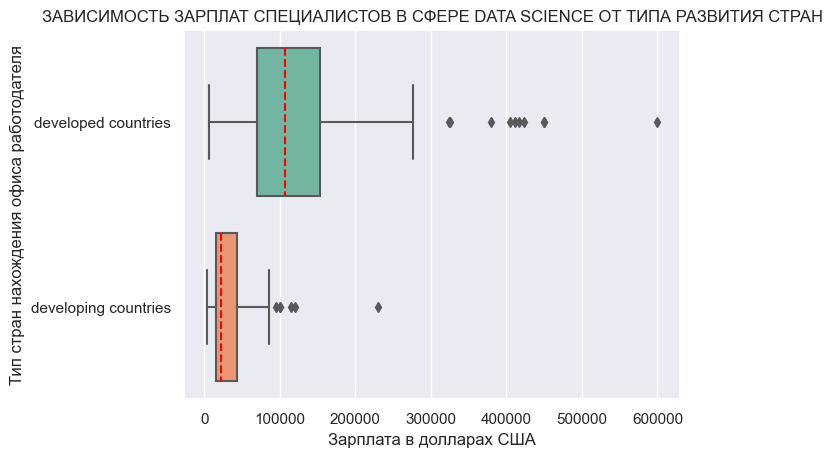

In [195]:
# Для проведения исследования разделим все данные на две группы по company_location (страна офиса работодателя) - на развитые и 
# развивающиеся страны.

# Определим списки развитых стран:

developed_countries = ['US', 'GB', 'CA', 'DE', 'FR', 'ES', 'GR', 'JP', 'NL', 'AT', 'PT', 'PL', 'LU', 'NL', 'AU', 'DK', 'IT', 'CZ', 'SI',
                       'CH', 'CN', 'BE', 'EE', 'SG', 'MT', 'IL', 'NZ']

# Остальные будут в списке развивающихся. Сформируем новый признак type_of_development с помощью lambda-функции:

data['type_of_development'] = data['company_location'].apply(lambda x: 'developed countries' if x in developed_countries 
                                                             else 'developing countries')

# Построим коробчатую диаграмму распределения признака зарплаты в разрезе развитых и развивающихся стран:

ax = sns.boxplot(data, x = 'salary_in_usd', y = 'type_of_development', orient = 'h', medianprops = {'color' : 'red', 'linestyle' : '--'})
ax.set(xlabel = 'Зарплата в долларах США', ylabel = 'Тип стран нахождения офиса работодателя')
plt.title('ЗАВИСИМОСТЬ ЗАРПЛАТ СПЕЦИАЛИСТОВ В СФЕРЕ DATA SCIENCE ОТ ТИПА РАЗВИТИЯ СТРАН')
plt.show()

*Выводы по графику: можно отметить, что медианная заралата в организациях из развитых стран намного выше, чем в развивающихся.*

Также ответим на бизнес-вопрос с помощью статистических тестов.

**Сформулируем нулевую и альтернативную гипотезы**

*Нулевая гипотеза* ($H_0$): зарплаты у специалистов в сфере Data Science в развитых странах ($μ_1$) равны или меньше, чем в равивающихся ($μ_2$).

$$ H_0 : μ_1 <= μ_2 $$

*Альтернативная гипотеза* ($H_1$): зарплаты у специалистов в сфере Data Science в развитых странах ($μ_1$) больше чем в равивающихся ($μ_2$).

$$ H_1 : μ_1 > μ_2 $$

**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально. Гипотезы теста Шапиро-Уилка:

*Нулевая гипотеза* ($H_0$): распределение данные является нормальным.

*Альтернативная гипотеза* ($H_1$): распределение данных отлично от нормального.

In [190]:
# Отберем данные по зарплатам по развитым и развивающимся странам:
data_developed = data[data['type_of_development'] == 'developed countries']['salary_in_usd']
data_developing = data[data['type_of_development'] == 'developing countries']['salary_in_usd']

# Проведем тест Шапиро-Уилка: 

print('Для развитых стран:')
result1 = stats.shapiro(data_developed)
decision_normality(result1[1])

print('Для развивающихся стран:')
result2 = stats.shapiro(data_developing)
decision_normality(result2[1])

Для развитых стран:
p-value = 0.000.
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального.
Для развивающихся стран:
p-value = 0.000.
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального.


**Выбор подходящего статистического теста:**

Используем алгоритм выбора теста:

1. Какой тип признака "Зарплата в долларах США"? - ***Количественный***
2. Сколько сравниваемых групп? - ***Две***
3. Группы зависимы? - ***Нет***
4. Признак распределен по нормальному закону? - ***Нет***

Таким образом, для проверки гипотезы используем U-критерий Манна-Уитни

**Тест:**

In [197]:
_, p = stats.mannwhitneyu(data_developed, data_developing, alternative = 'greater')
decision_hypothesis(p)

p-value = 0.000.
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


*Вывод: таким образом, в развитых странах средние зарплаты в сфере Data Science выше, чем в развивающихся.*

### 5.2 Бизнес-вопрос: Как соотносятся зарплаты специалистов Data Scientist, Data Engineer	и Data Analyst, которые находятся в США?

Визуальный анализ данных показал, что в организациях из США самые высокие зарплаты в сфере Data Science, а также у специалистов, которые находятся в США также самые высокие зарплаты.

Сравним, как соотносятся зарплаты специалистов из США по трем самым популярным должностям - Data Scientis, Data Engineer и Data Analyst.

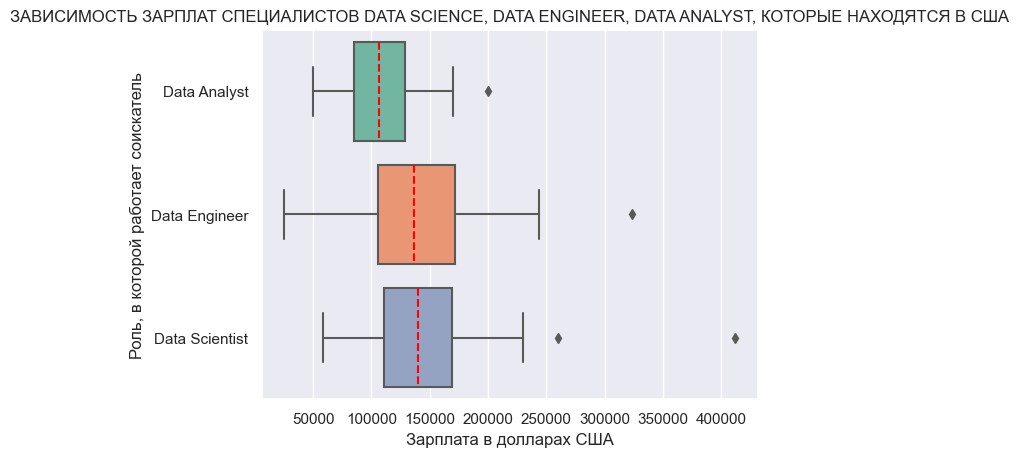

In [198]:
# Подготовим данные для иследования - отберем по стране проживания сотрудника (США) и должностям:

data_US_DS_SE_DA = data[(data['employee_residence'] == 'US') & (data['job_title'].isin(['Data Scientist', 'Data Engineer', 'Data Analyst']))]

# Построим коробчатую диаграмму распределения:

ax = sns.boxplot(data_US_DS_SE_DA, x = 'salary_in_usd', y = 'job_title', orient = 'h', medianprops = {'color' : 'red', 'linestyle' : '--'})
ax.set(xlabel = 'Зарплата в долларах США', ylabel = 'Роль, в которой работает соискатель')
plt.title('ЗАВИСИМОСТЬ ЗАРПЛАТ СПЕЦИАЛИСТОВ DATA SCIENCE, DATA ENGINEER, DATA ANALYST, КОТОРЫЕ НАХОДЯТСЯ В США')
plt.show()

*Вывод по графику: можно отметить, что медианные зарплаты у специалистов из США Data Scientist и Data Engineer примерно равны, а у Data Analyst немного ниже.*

*Далее посмотрим, что покажет статистический тест.*

**Сформулируем нулевую и альтернативную гипотезы**

*Нулевая гипотеза* ($H_0$): зарплаты в США у специалистов Data Scientist, Data Engineer и Data Analyst одинаковы.

*Альтернативная гипотеза* ($H_1$): зарплаты в США у специалистов Data Scientist, Data Engineer и Data Analyst не одинаковы.

**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально. Гипотезы теста Шапиро-Уилка:

*Нулевая гипотеза* ($H_0$): распределение данные является нормальным.

*Альтернативная гипотеза* ($H_1$): распределение данных отлично от нормального.

In [193]:
# Подготовим данные для анализа - отберем по стране проживания соискателя США и должностям Data Scientist, Data Engineer, Data Analyst

data_US_DS = data[(data['employee_residence'] == 'US') & (data['job_title'] == 'Data Scientist')]['salary_in_usd']
data_US_DE = data[(data['employee_residence'] == 'US') & (data['job_title'] == 'Data Engineer')]['salary_in_usd']
data_US_DA = data[(data['employee_residence'] == 'US') & (data['job_title'] == 'Data Analyst')]['salary_in_usd']

# Проведем тест Шапиро-Уилка: 

print('Для Data Scientist:')
result1 = stats.shapiro(data_US_DS)
decision_normality(result1[1])

print('Для Data Engineer:')
result2 = stats.shapiro(data_US_DE)
decision_normality(result2[1])

print('Для Data Analyst:')
result3 = stats.shapiro(data_US_DA)
decision_normality(result3[1])

Для Data Scientist:
p-value = 0.000.
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального.
Для Data Engineer:
p-value = 0.160.
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным.
Для Data Analyst:
p-value = 0.529.
p-значение больше, чем заданный уровень значимости 0.05. Распределение является нормальным.


**Выбор подходящего статистического теста:**

Используем алгоритм выбора теста:

1. Какой тип признака "Зарплата в долларах США"? - ***Количественный***
2. Сколько сравниваемых групп? - ***Три***
3. Группы зависимы? - ***Нет***
4. Признак распределен по нормальному закону? - ***Нет***

Таким образом, для проверки гипотезы используем критерий Краскела-Уоллиса

**Тест:**

In [194]:
_, p = stats.kruskal(data_US_DS, data_US_DE, data_US_DA)
decision_hypothesis(p)

p-value = 0.000.
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


*Вывод: таким образом, зарплаты специалистов Data Scientist, Data Engineer, Data Analyst не одинаковы.*

___

ОБЩИЙ ВЫВОД: таким образом, на зарплаты в сфере Data Science влияют несколько факторов, а именно:

1. Год, в котором была выплачена зарплата. 
2. Опыт работы на должности. 
3. Роль, в которой соискатель работал в течение года.
4. Основная страна проживания сотрудника в течение рабочего года. 
5. Общий объём работы, выполняемой удалённо. 
6. Страна главного офиса работодателя или филиала по контракту. 
7. Среднее количество людей, работавших в компании в течение года.  